In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import lmfit

In [6]:
daten_4_calib = pd.read_csv('D:\Projekte\Innprojekt\Auswertungen\Sedimenteintrag\SDR_neu_Inn\SDR_ZonalStat_calib.csv', sep=';', decimal=',', 
                            encoding='latin-1', header=0)
daten_4_calib

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],ER_gesamt,SDR_realworld,Area [m²],IM_A_NAT,IM_A_NAT_Anteil,IM_A_MNT,...,IM_PREC_yr [mm/a],IM_PREC_s [mm/summer],elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,170833.1,317026.88220,0.538860,726933125,356.947421,0.491032,14.123907,...,31661.93908,17304.36242,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
1,bruckh_2008,bruckh_ezg,2008,71813.2,62259.94383,1.153441,316188125,118.516326,0.374829,4.323956,...,18835.80132,11010.97880,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
2,koessen_2008,koessen_ezg,2008,164824.3,126776.51100,1.300117,734265000,327.762693,0.446382,8.339129,...,41390.84165,21536.23297,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
3,landeck_2009,landeck_br2_ezg,2009,50897.9,329038.61050,0.154687,726933125,356.947421,0.491032,14.123907,...,26607.85176,15297.12032,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
4,innsreich_2009,innsreich_ezg,2009,133564.3,365746.20840,0.365183,846703125,344.311337,0.406649,0.991554,...,33020.27666,19805.26868,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
5,bruckh_2009,bruckh_ezg,2009,59690.5,75337.38618,0.792309,316188125,118.516326,0.374829,4.323956,...,22066.12130,14911.87688,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
6,koessen_2009,koessen_ezg,2009,265521.2,152834.51620,1.737312,734265000,327.762693,0.446382,8.339129,...,49151.74136,31007.40090,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
7,landeck_2010,landeck_br2_ezg,2010,378974.1,407454.41090,0.930102,726933125,356.947421,0.491032,14.123907,...,29803.28552,21411.50334,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
8,innsreich_2010,innsreich_ezg,2010,115137.0,417833.11220,0.275557,846703125,344.311337,0.406649,0.991554,...,35351.23930,26018.26549,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2010,bruckh_ezg,2010,114665.1,74343.61901,1.542366,316188125,118.516326,0.374829,4.323956,...,14506.82636,10959.24820,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


In [86]:
daten_calib = daten_4_calib
daten_calib

,EZG_year,EZG_NAME,year,SedFracht_gemessen [t/a],ER_gesamt,SDR_realworld,Area [m²],IM_A_NAT,IM_A_NAT_Anteil,IM_A_MNT,...,IM_PREC_yr [mm/a],IM_PREC_s [mm/summer],elev,dist2stream,elevabvstream,slope,streampowerindex,topowetnessindex,toporoughnessindex,sedtransportindex
0,landeck_2008,landeck_br2_ezg,2008,170833.1,317026.88220,0.538860,726933125,356.947421,0.491032,14.123907,...,31661.93908,17304.36242,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
1,bruckh_2008,bruckh_ezg,2008,71813.2,62259.94383,1.153441,316188125,118.516326,0.374829,4.323956,...,18835.80132,11010.97880,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
2,koessen_2008,koessen_ezg,2008,164824.3,126776.51100,1.300117,734265000,327.762693,0.446382,8.339129,...,41390.84165,21536.23297,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
3,landeck_2009,landeck_br2_ezg,2009,50897.9,329038.61050,0.154687,726933125,356.947421,0.491032,14.123907,...,26607.85176,15297.12032,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
4,innsreich_2009,innsreich_ezg,2009,133564.3,365746.20840,0.365183,846703125,344.311337,0.406649,0.991554,...,33020.27666,19805.26868,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
5,bruckh_2009,bruckh_ezg,2009,59690.5,75337.38618,0.792309,316188125,118.516326,0.374829,4.323956,...,22066.12130,14911.87688,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09
6,koessen_2009,koessen_ezg,2009,265521.2,152834.51620,1.737312,734265000,327.762693,0.446382,8.339129,...,49151.74136,31007.40090,1189.11,1237.59,275.35,19.84,45.56,3.35,8.26,6.17
7,landeck_2010,landeck_br2_ezg,2010,378974.1,407454.41090,0.930102,726933125,356.947421,0.491032,14.123907,...,29803.28552,21411.50334,2123.67,1239.87,439.18,26.63,84.30,3.03,11.47,9.18
8,innsreich_2010,innsreich_ezg,2010,115137.0,417833.11220,0.275557,846703125,344.311337,0.406649,0.991554,...,35351.23930,26018.26549,1897.84,1267.54,443.92,26.08,90.10,3.12,11.28,9.11
9,bruckh_2010,bruckh_ezg,2010,114665.1,74343.61901,1.542366,316188125,118.516326,0.374829,4.323956,...,14506.82636,10959.24820,1330.51,1205.20,333.99,20.82,41.82,3.41,8.55,7.09


In [5]:
# with lmfit:

a = lmfit.Parameter(name='ER_FCT_a_SDR', value=0.006684, vary=True)
d = lmfit.Parameter(name='ER_FCT_d_SDR', value=-0.25, vary=True)
exp_a = lmfit.Parameter(name='ER_EXP_a_SDR', value=0.3, vary=True)
e = lmfit.Parameter(name='ER_FCT_e_SDR', value=20, vary=True)
exp_b = lmfit.Parameter(name='ER_EXP_b_SDR', value=1.5, vary=True)

ER_SLP_dem25 = 
ER_SHR_a_al_tot

def SDR_MoRE(params, slope, anteilA):
    parvals = pars.valuesdict()
    # oder die values der einzelnen Parameter
    
    SDR = a * (slope + d)^exp_a * (anteilA + e)^exp_b

lmfit.minimize()

In [7]:
# with scipy:

from scipy.optimize import curve_fit

In [8]:
slope = daten_4_calib['slope']
anteil_AL = daten_4_calib['ER_SHR_a_al_tot']
SDR_realword = daten_4_calib['SDR_realworld']

In [9]:
X = (slope, anteil_AL)

In [11]:
type(X)

tuple

In [16]:
def SDR_MoRE(X, a, d, exp_a, e, exp_b):
    x, y = X
    return a * (x + d)**exp_a * (y + e)**exp_b

In [13]:
p0 = (0.006684, -0.25, 0.3, 20, 1.5)

In [18]:
p0_2 = (0.00001, 0.00001, 0.00001, 0.00001, 0.00001)

In [19]:
popt, pcov = curve_fit(SDR_MoRE, X, SDR_realword, p0_2)

In [20]:
print(popt)

[ 0.00910828  3.57518001  1.48706212 -0.03547754  0.04494723]


In [26]:
X2 = (daten_4_calib['IM_A_NAT_Anteil']*100, daten_4_calib['BI_Q_dir [m³/s]'])

popt2, pcov2 = curve_fit(SDR_MoRE, X2, SDR_realword, p0_2, maxfev=5000)

print(popt2)

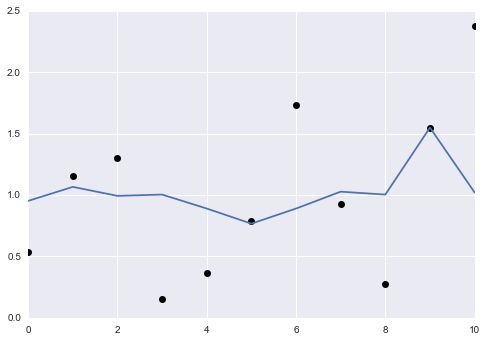

In [50]:
# xx = np.linspace(0, 1, 5)

yy2 = SDR_MoRE(X2, *popt2)

plt.plot(daten_4_calib['SDR_realworld'], 'ko')
plt.plot(yy2)

In [63]:
X3 = (daten_4_calib['BI_Q [m³/s]'], daten_4_calib['IM_A_MNT_Anteil']*100)

popt3, pcov3 = curve_fit(SDR_MoRE, X3, SDR_realword, p0_2, maxfev=5000)

print(popt3)

[ 0.01038874  1.32193536  1.42867801 -0.12        0.03434688]


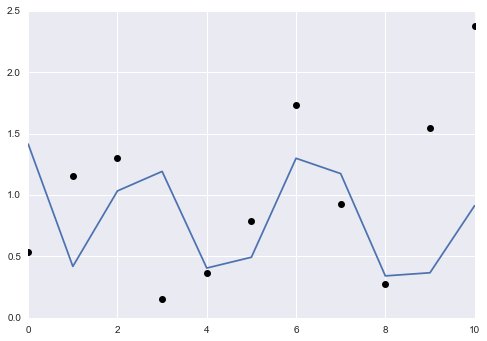

In [64]:
yy3 = SDR_MoRE(X3, *popt3)

plt.plot(daten_4_calib['SDR_realworld'], 'ko')
plt.plot(yy3)

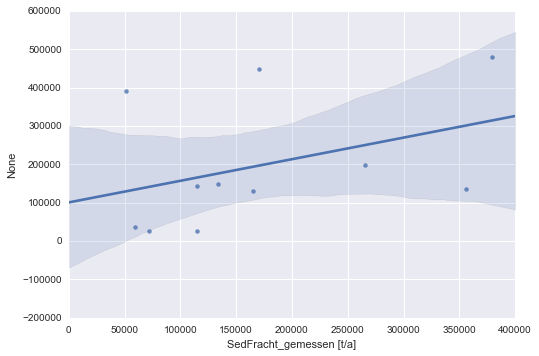

In [70]:
test_popt3 = SDR_MoRE(X3, *popt3) * daten_4_calib['ER_gesamt']

sns.regplot(daten_4_calib['SedFracht_gemessen [t/a]'], test_popt3)

[    69.924632     9250.60983366    -77.864941    39353.65482848
     67.07327262]


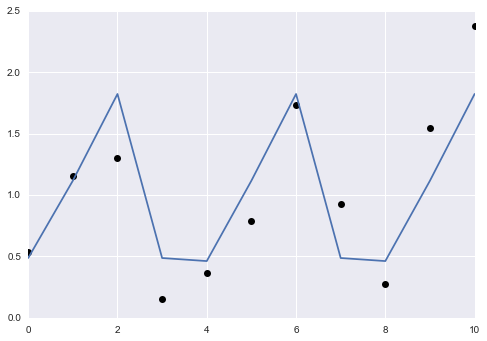

In [72]:
X4 = (daten_4_calib['elevabvstream'], daten_4_calib['IM_A_NAT_Anteil']*100)

popt4, pcov4 = curve_fit(SDR_MoRE, X4, SDR_realword, p0_2, maxfev=5000)

print(popt4)

yy4 = SDR_MoRE(X4, *popt4)

plt.plot(daten_4_calib['SDR_realworld'], 'ko')
plt.plot(yy4)

In [75]:
yy4

0     0.486976
1     1.116927
2     1.823242
3     0.486976
4     0.462095
5     1.116927
6     1.823242
7     0.486976
8     0.462095
9     1.116927
10    1.823242
dtype: float64

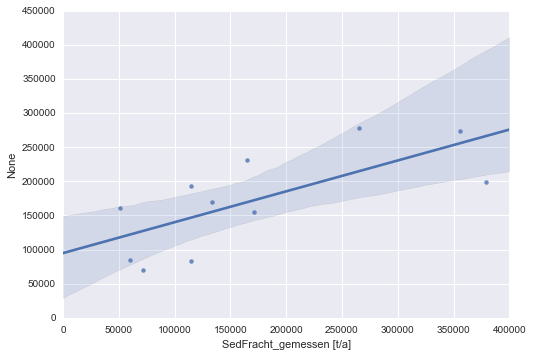

In [73]:
test_popt4 = SDR_MoRE(X4, *popt4) * daten_4_calib['ER_gesamt']

sns.regplot(daten_4_calib['SedFracht_gemessen [t/a]'], test_popt4)

[  1.78028285e-01   1.20153622e+04  -7.50756388e+01   1.52134852e+02
   1.40990426e+02]


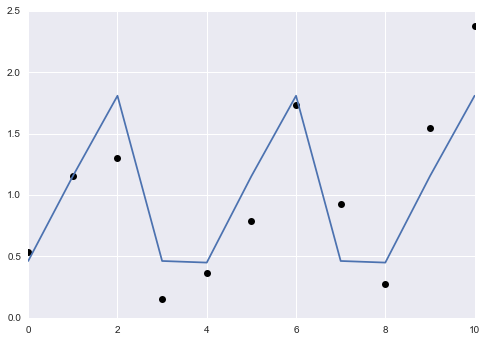

In [84]:
X5 = (daten_4_calib['elevabvstream'], daten_4_calib['IM_A_WS_Anteil']*100)

popt5, pcov5 = curve_fit(SDR_MoRE, X5, SDR_realword, p0_2, maxfev=5000)

print(popt5)

yy5 = SDR_MoRE(X5, *popt5)

plt.plot(daten_4_calib['SDR_realworld'], 'ko')
plt.plot(yy5)

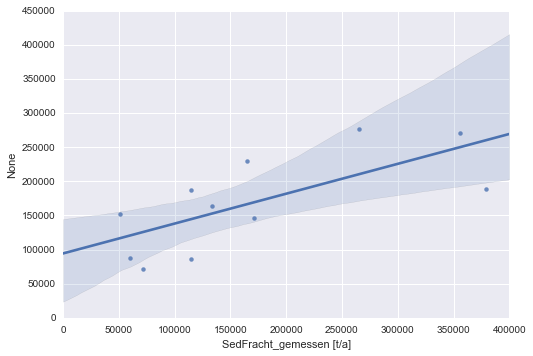

In [85]:
test_popt5 = SDR_MoRE(X5, *popt5) * daten_4_calib['ER_gesamt']

sns.regplot(daten_4_calib['SedFracht_gemessen [t/a]'], test_popt5)

[ 0.00910828  3.57518001  1.48706212 -0.03547754  0.04494723]


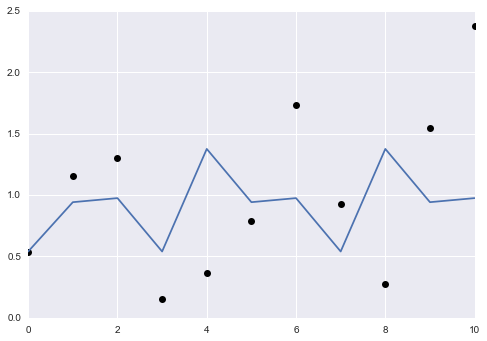

In [87]:
X6 = (daten_calib['slope'], daten_calib['ER_SHR_a_al_tot'])

popt6, pcov6 = curve_fit(SDR_MoRE, X6, SDR_realword, p0_2, maxfev=5000)

print(popt6)

yy6 = SDR_MoRE(X6, *popt6)

plt.plot(daten_calib['SDR_realworld'], 'ko')
plt.plot(yy6)

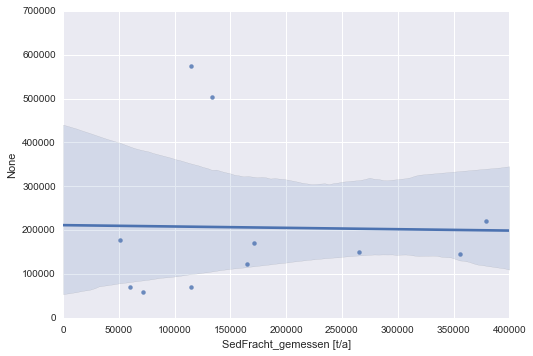

In [88]:
test_popt6 = SDR_MoRE(X6, *popt6) * daten_calib['ER_gesamt']

sns.regplot(daten_calib['SedFracht_gemessen [t/a]'], test_popt6)